In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_init = pd.read_csv("./results/RES_05.2_FINAL_mo_5.csv")
df_f = pd.DataFrame(df_init[['qF1', 'qF2', 'qF3']])
df_h = pd.DataFrame(df_init[['qH1', 'qH2', 'qH3']])

def import_consts(negative_prices=False):
    prices = pd.read_csv("./data/prices.csv")
    prices_B = np.maximum(prices["Up"].to_numpy(),0)
    prices_S = np.maximum(prices["Down"].to_numpy(),0)
    prices_F = np.maximum(prices["Forward"].to_numpy(),0)
    prices_bal = np.maximum(prices["SinglePrice"].to_numpy(),0)

    features_all = pd.read_csv("./data/features.csv")
    realized = features_all.loc[:, "realized"].to_numpy()
    max_elec = 10
    max_wind = 13
    nominal_wind = 10
    
    x_values = pd.read_csv('./results/x_max.csv')
    forecast = x_values.iloc[:,0]
    price_H = 35.199999999999996
    realized = realized * nominal_wind
    return (
        prices_B,
        prices_S,
        prices_F,
        prices_bal,
        forecast,
        realized,
        price_H,
        max_elec,
        nominal_wind,
    )

(
        prices_B,
        prices_S,
        prices_F,
        prices_bal,
        forecast,
        realized,
        price_H,
        max_elec,
        nominal_wind,
    ) = import_consts()


def get_forward(df, features, i):
    hour_of_day = (i % 24) 
    if (hour_of_day == -1):
        hour_of_day = 23
    return (df.iloc[hour_of_day, 0]*features[0][i] + df.iloc[hour_of_day, 1]*features[1][i] + df.iloc[hour_of_day, 2])

def get_hydro(df, features, max_elec, i):
    hour_of_day = (i % 24) 
    if (hour_of_day == -1):
        hour_of_day = 23
    return np.minimum(max_elec, np.maximum(0, (df.iloc[hour_of_day, 0]*features[0][i] + df.iloc[hour_of_day, 1]*features[1][i] + df.iloc[hour_of_day, 2])))


FileNotFoundError: [Errno 2] No such file or directory: './results/RES_05.2_FINAL_mo_5.csv'

In [3]:
forward_bids = []
planned_production = []
month = 24*30
year = 8760
validation_period = 0
training_period = year
offset = len(prices_F) - validation_period - training_period

for i in range(offset, offset+training_period):
    if prices_F[i] > price_H:
        forward_bid = get_forward(df_f, [forecast, prices_F], i)
    else:
        forward_bid = 0

    hydrogen = get_hydro(df_h, [forecast, prices_F], max_elec, i)

    forward_bids.append(forward_bid)
    planned_production.append(hydrogen)

df_bids = pd.DataFrame(forward_bids)
df_prods = pd.DataFrame(planned_production)

df_bids.to_csv('./results/fixed_bids.csv')
df_prods.to_csv('./results/fixed_prods.csv')


In [5]:
offset + month + year

18264

## COLORS

In [3]:
red = (0.77, 0, 0.05) # (196, 0, 13)
blue = (0.12, 0.24, 1) # (31, 61, 255)
green = (0.31, 1, 0.34) # (79, 255, 87)
navyblue = (0, 0, 0.4) # (0, 0, 102)
black = (0, 0, 0)
white = (1, 1, 1)

## Constructing the price curve

C:\Users\emilh\AppData\Local\Temp\ipykernel_17104\1090961033.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


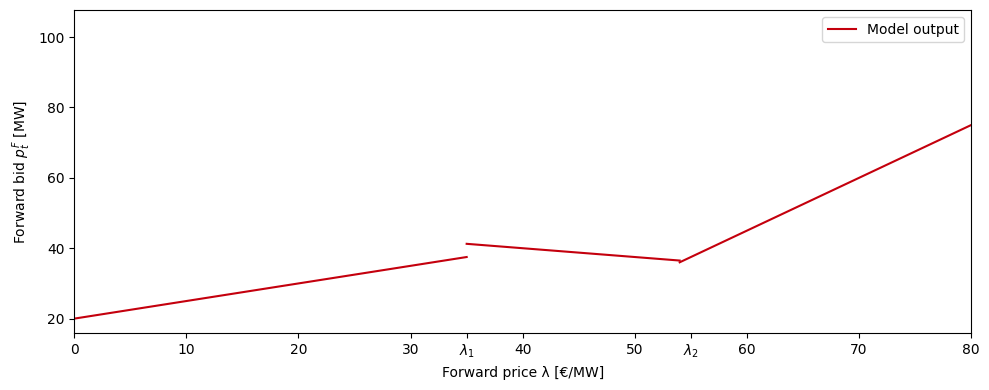

In [25]:
#--------------------Normal price curve from model
xlabel = "Forward price λ [€/MW]"
ylabel = "Forward bid $p^F_t$ [MW]"
title = "Price curve construction"
step = 10
step_small = 5
xs = [x for x in range(36)] + [x for x in range(35,100)]
ys = np.array([0 for x in range(36)] + [0.5*x + 20 for x in range(35, 100)])
# ys = np.array([0.5*x + 20 for x in range(100)])
steps = range(0, 110, step)
steps_small = range(0, 110, step_small)
bids = np.array([0 for x in range(5)] + [0.5*x+20 - 0.5*step/2 for x in range(50, 110, step)])
# bids = np.array([0.5*x+20 - 0.5*step/2 for x in range(0, 110, step)])
bids_small = np.array([0 for x in range(0, 40, step_small)] + [0.5*x+20 - 0.5*step_small/2 for x in range(40, 110, step_small)])
# bids_small = np.array([0.5*x+20 - 0.5*step_small/2 for x in range(0, 110, step_small)])
fig, ax = plt.subplots(figsize=(10,4))


# ax.set_xlabel(xlabel)
# ax.set_ylabel(ylabel)
# ax.plot(xs, ys, label="Model output = $p^F_t(\lambda)$", color=red)
# ax.set_xlim([30, 100])
# ax.legend()
# ax.set_xticks([30, 35, 40, 50, 60, 70, 80, 90, 100])
# ax.set_xticklabels([30, "$\lambda^H$", 40, 50, 60, 70, 80, 90, 100])
# fig.tight_layout()
# fig.show()

# fig.savefig("pc_model_output.pdf")

xs1 = [x for x in range(36)] 
xs2 = [x for x in range(35,55)]
xs3 = [x for x in range(54,100)]

ys1 = [0.5*x + 20 for x in range(36)]
ys2 = [-0.25*x + 50 for x in range(35,55)]
ys3 = [1.5*x - 45 for x in range(54,100)]

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
# ax.plot(xs, ys, label="Model output", color=red)
ax.plot(xs1, ys1, label="Model output", color=red)
ax.plot(xs2, ys2, color=red)
ax.plot(xs3, ys3, color=red)
# ax.step(steps, bids, label="Low resolution price curve", color=blue)
ax.set_xticks([0, 10, 20, 30, 35, 40, 50, 55, 60, 70, 80, 90, 100])
ax.set_xticklabels([0, 10, 20, 30, "$\lambda_1$", 40, 50, "$\lambda_2$", 60, 70, 80, 90, 100])
ax.set_xlim([0, 80])
ax.legend()
fig.tight_layout()
fig.show()

# fig.savefig("pc_low_res.pdf")

# ax.set_xlabel(xlabel)
# ax.set_ylabel(ylabel)
# ax.plot(xs, ys, label="Model output", color=red)
# ax.step(steps_small, bids_small, 'g', label="High resolution price curve", color=blue)
# # ax.step(steps_small, bids_small, 'g', label="Constructed bidding curve", color=blue)
# ax.set_xticks([30, 35, 40, 50, 60, 70, 80, 90, 100])
# ax.set_xticklabels([30, "$\lambda^H$", 40, 50, 60, 70, 80, 90, 100])
# ax.set_xlim([30, 100])
# ax.legend()
# fig.tight_layout()
# fig.show()

fig.savefig("pricecurve_PD.pdf")

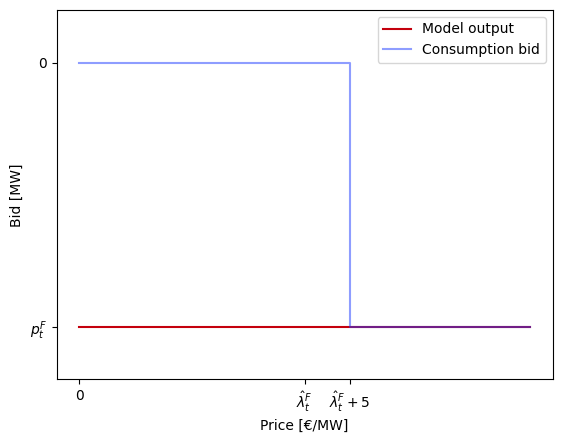

In [21]:
#--------------------------step for deterministic

# fig, ax = plt.subplots()

# x_ticks = [0, 5, 6]
# x_tick_labels = [0, "$\hat{\lambda}^F_t - 5$", "$\hat{\lambda}^F_t$"]
# y_ticks = [0, 5]
# y_tick_labels = [0, "$p^F_t$"]

# ax.step([0, 5, 10], [5, 5, 5], label="Model output", color=red)
# ax.step([0, 5, 10], [0, 0, 5], label="Production bid", color=blue, alpha=0.5)
# ax.set_xticks(x_ticks)
# ax.set_xticklabels(x_tick_labels)
# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_tick_labels)
# ax.set_xlabel("Price [€/MW]")
# ax.set_ylabel("Bid [MW]")
# ax.set_ylim([-1, 7])
# ax.legend()
# fig.savefig("./pdfs/det_prod_bid.pdf")

fig, ax = plt.subplots()
x_ticks = [0, 5, 6]
x_tick_labels = [0, "$\hat{\lambda}^F_t$", "$\hat{\lambda}^F_t + 5$"]
y_ticks = [-5, 0]
y_tick_labels = ["$p^F_t$", 0]

ax.step([0, 5, 10], [-5, -5, -5], label="Model output", color=red)
ax.step([0, 6, 10], [0, 0, -5], label="Consumption bid", color=blue, alpha=0.5)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim([-6, 1])
ax.set_xlabel("Price [€/MW]")
ax.set_ylabel("Bid [MW]")
ax.legend()
fig.savefig("./pdfs/det_con_bid.pdf")

C:\Users\emilh\AppData\Local\Temp\ipykernel_20820\3294456223.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


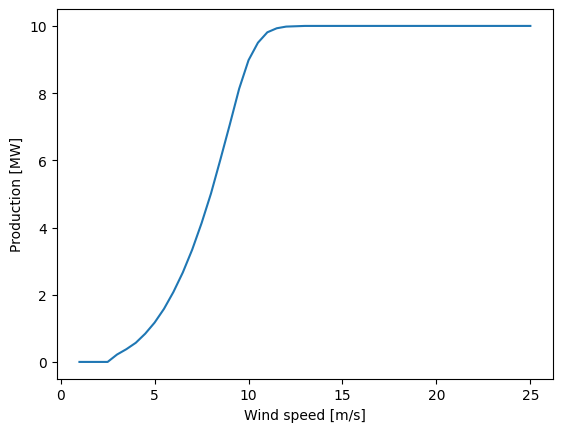

In [7]:
fig, ax = plt.subplots()
wind_speeds = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, ]
wind_power = [0.00, 0.00, 0.00, 0.00, 0.22, 0.38, 0.57, 0.84, 1.17, 1.58, 2.08, 2.66, 3.34, 4.13, 5.01, 6.02, 7.06, 8.13, 8.98, 9.50, 9.81, 9.93, 9.98, 9.99, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, ]

ax.plot(wind_speeds, wind_power)
ax.set_xlabel("Wind speed [m/s]")
ax.set_ylabel("Production [MW]")

fig.show()
fig.savefig("production_curve.pdf")